In [1]:
import pandas as pd

df = pd.read_csv("fct_invoice.csv")

df.head()

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon


In [5]:
#Question 1 EASY FINAL 

import pandas as pd

df = pd.read_csv("fct_invoice.csv")


num_unique_customers = df['customer_id'].nunique()

print("Number of unique customers:", num_unique_customers)


Number of unique customers: 5191


In [8]:
#Question 2 EASY FINAL
import pandas as pd

df = pd.read_csv("fct_invoice.csv")

categ = df["category"].unique()
num_categories = df["category"].nunique()


print("Categories: ", categ)
print("Number of Unique Categories",num_categories)

Categories:  ['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']
Number of Unique Categories 8


In [6]:
#Question 3 EASY FINAL

import pandas as pd

df = pd.read_csv("fct_invoice.csv")

method = df["payment_method"].unique()

payment_method_counts = df["payment_method"].value_counts()
most_popular_method = payment_method_counts.index[0]

print("Payment Methods Available:", method)
print("Most Popular Payment Method:", most_popular_method)
print(payment_method_counts)


Payment Methods Available: ['Credit Card' 'Debit Card' 'Cash']
Most Popular Payment Method: Cash
Cash           44447
Credit Card    34931
Debit Card     20079
Name: payment_method, dtype: int64


In [24]:
import pandas as pd

df = pd.read_json("dim_customer.json")

print (df.head())


    age first_name gender  id last_name
0  48.0   Nicholas      M   0    Flores
1   NaN    Jeffery      M   1      Rowe
2  57.0     Alexis      F   2    Benton
3  73.0        Amy      F   3   Johnson
4  20.0      David      M   4     Moore


In [18]:
# Question 1 MEDIUM

import pandas as pd
df = pd.read_csv('fct_invoice.csv')

df['TotalSales'] = df['price'] * df['quantity']
category_sales = df.groupby('category')['TotalSales'].sum()
sorted_categories = category_sales.sort_values(ascending=False)
top_three_categories = sorted_categories.head(3)

print("Top three categories:", top_three_categories)





Top three categories: category
Clothing      1.139968e+08
Shoes         6.655345e+07
Technology    5.786235e+07
Name: TotalSales, dtype: float64


In [19]:
#Question 2 MEDIUM 
import pandas as pd

df_invoice = pd.read_csv("fct_invoice.csv")
df_customer = pd.read_json("dim_customer.json")

merged_df = pd.merge(df_invoice, df_customer, left_on="customer_id", right_on="id")
filtered_df = merged_df[merged_df['age'] > 45]
filtered_df['TotalSales'] = filtered_df['price'] * filtered_df['quantity']
total_sales_over_45 = filtered_df['TotalSales'].sum()

print("Total Sales for Customers over 45:", total_sales_over_45)




Total Sales for Customers over 45: 82039768.15


/var/folders/hb/wzm2gs0x69zgp01000bck4p40000gn/T/ipykernel_451/182198800.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['TotalSales'] = filtered_df['price'] * filtered_df['quantity']


/var/folders/hb/wzm2gs0x69zgp01000bck4p40000gn/T/ipykernel_96934/1950936307.py:11: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['invoice_date'] = pd.to_datetime(df['invoice_date'])


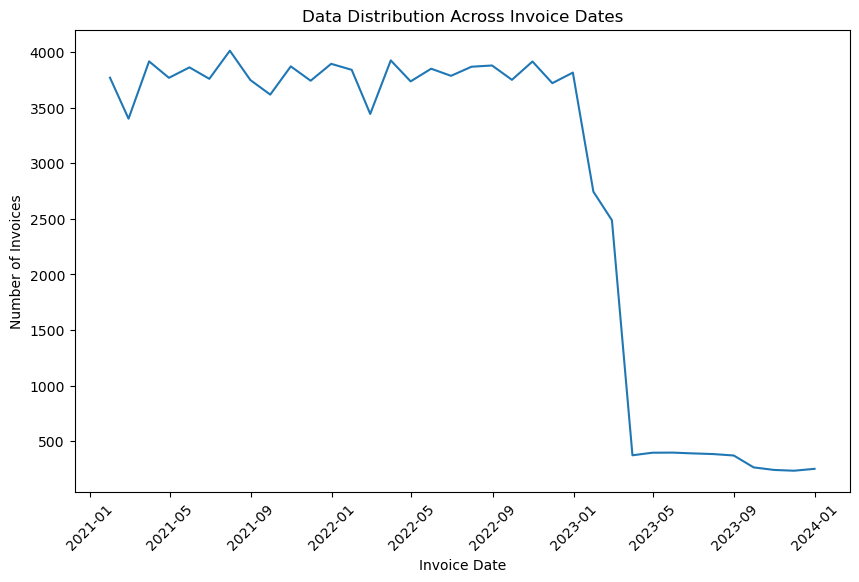

In [22]:
#Question 3 MEDIUM

import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("fct_invoice.csv")

df['invoice_date'] = pd.to_datetime(df['invoice_date'])
df.set_index('invoice_date', inplace=True)
monthly_counts = df.resample('M').size()

plt.figure(figsize=(10, 6))
plt.plot(monthly_counts.index, monthly_counts.values)
plt.title('Data Distribution Across Invoice Dates')
plt.xlabel('Invoice Date')
plt.ylabel('Number of Invoices')
plt.xticks(rotation=45)
plt.show()


In 2021, 2022, and 2023, the start of the year seems to experience a decline in sales (directly after the holiday season), but things start to pick up approaching May in 2021 and 2022. However, in 2023, unlike in the previous 2 years, a sharp decline is observed. This means that fewer sales transactions have been taking place, which could be an indication of a decline in sales performance and business activity. Starting 2023 until early 2024, number of invoices seem to only stay below 500, which is a large difference from the 3000-4000 it would get from 2021 and 2022 monthly. This prolonged downturn in sales activity might suggest less inclination towards in-person shopping and a shift towards alternative purchasing methods such as online shopping.

In [20]:
#HARD 

import pandas as pd

df_invoice = pd.read_csv("fct_invoice.csv")
df_customer = pd.read_json("dim_customer.json")

merged_df = pd.merge(df_invoice, df_customer, left_on="customer_id", right_on="id")
merged_df['Decade Age Range'] = (merged_df['age'] // 10) * 10
merged_df['TotalSales'] = merged_df['price'] * merged_df['quantity']

pivot_table = merged_df.pivot_table(values='TotalSales', index='category', columns='Decade Age Range', aggfunc='sum', fill_value=0)

print(pivot_table)

Decade Age Range        10.0         20.0         30.0         40.0  \
category                                                              
Books               12801.75     79461.75     84143.10     87203.40   
Clothing          1927413.84  10250732.80  11354126.96  11215189.92   
Cosmetics          109619.36    605915.32    723544.70    665034.96   
Food & Beverage     13582.31     73491.96     87246.86     89553.29   
Shoes              993281.35   5924878.24   7200839.66   7025590.02   
Souvenir            12375.15     54943.32     64092.72     66391.80   
Technology        1129800.00   5261550.00   6159300.00   5954550.00   
Toys                60426.24    385100.80    420582.40    390906.88   

Decade Age Range         50.0         60.0        70.0        80.0  
category                                                            
Books                74962.20     80476.80    54827.85    26664.00  
Clothing          10321851.76  10660642.08  7769371.28  4493698.00  
Cosmetics    